# Week 9 & 10 Exercises
# Rahul Rajeev

**1. Data Wrangling with Python: Activity 9, page 294**

In [144]:
# 1. imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import regex as re
from bs4 import BeautifulSoup
import requests
import seaborn as sns

In [6]:
top100url = 'https://www.gutenberg.org/browse/scores/top'

# 2. check the ssl certificate and # 3. read the html from the url
response = requests.get('https://www.gutenberg.org/browse/scores/top')
print(response)

<Response [200]>


The request didn't raise an ssl error, so the website has ssl certification.

In [8]:
# 4. small function to describe the status of the web request
def status_check(r):
    if r.status_code==200:
        print("Success!")
    else:
        print("Failed!")
status_check(response)

Success!


In [12]:
# 5. decode the response and pass this to beautiful soup for html parsing
body = response.content.decode(response.encoding)
soup = BeautifulSoup(body, 'html.parser')

In [57]:
# 6. find all the href tags and store them as a list of links, print the first 30 elements
linklst = []
for link in soup.find_all('a'):
    #print(link.get('href'))
    linklst.append(link.get('href'))

linklst[:30]

['/',
 '/about/',
 '/about/',
 '/policy/collection_development.html',
 '/about/contact_information.html',
 '/about/background/',
 '/policy/permission.html',
 '/policy/privacy_policy.html',
 '/policy/terms_of_use.html',
 '/ebooks/',
 '/ebooks/',
 '/ebooks/bookshelf/',
 '/browse/scores/top',
 '/ebooks/offline_catalogs.html',
 '/help/',
 '/help/',
 '/help/copyright.html',
 '/help/errata.html',
 '/help/file_formats.html',
 '/help/faq.html',
 '/policy/',
 '/help/public_domain_ebook_submission.html',
 '/help/submitting_your_own_work.html',
 '/help/mobile.html',
 '/attic/',
 '/donate/',
 '/donate/',
 '#books-last1',
 '#authors-last1',
 '#books-last7']

In [197]:
# 7-8. Use a regular expression to find the numeric digits in these links.

booknum = []
# the first link for the top 100 ebooks starts at 33 and goes till 133
for i in range(33, 133):
    link  = linklst[i]
    link = link.strip()
    # Regular expression to find the numeric digits in the link (href) string
    n=re.findall('[0-9]+',link)
    #print(n)
    booknum.append(int(n[0]))

#print(len(booknum))
#booknum[0]

In [58]:
# 9. What does the soup object's text look like? Use the .text method and print only the first 2000 characters
print(soup.text[:2000])





Top 100 | Project Gutenberg



























Menu▾



About
          ▾

▾


About Project Gutenberg
Collection Development
Contact Us
History & Philosophy
Permissions & License
Privacy Policy
Terms of Use



Search and Browse
      	  ▾

▾


Book Search
Bookshelves
Frequently Downloaded
Offline Catalogs



Help
          ▾

▾


All help topics →
Copyright How-To
Errata, Fixes and Bug Reports
File Formats
Frequently Asked Questions
Policies →
Public Domain eBook Submission
Submitting Your Own Work
Tablets, Phones and eReaders
The Attic →


Donate










Donation







Frequently Viewed or Downloaded
These listings are based on the number of times each eBook gets downloaded.
      Multiple downloads from the same Internet address on the same day count as one download, and addresses that download more than 100 eBooks in a day are considered robots and are not counted.

Downloaded Books
2023-05-07234665
last 7 days1829725
last 30 days7696440



Top 100 EBooks yesterday
T

10. Search in the extracted text from the soup object to find the names of the top 100 eBooks (yesterday's ranking).

In the extracted text, the top 100 ebooks yesterday follow after a line that says just that, and a line after. We should fine the index of the line its at, and use that as a starting index.

In [71]:
# 11. Create a starting index. It should point at the text Top 100 Ebooks yesterday. 
# Use the splitlines method of soup.text. It splits the lines of text of the soup object.
start=soup.text.splitlines().index('Top 100 EBooks yesterday')
start

113

There was two Top 100 Ebooks yesterday in the text, so I found that the next link happened 8 lines later. Then I added two to get to the first book link.

In [82]:
# 12. Loop 1-100 to add the strings of the next 100 lines to this temporary list. Hint: use the splitlines method.
titles = []
for i in range(100):
    # starting at line 113 plus 10 to the line of the books plus the iterator which starts at 0
    first_index = start + 10 + i
    line = soup.text.splitlines()[first_index]
    #print(line)
    titles.append(line)

In [83]:
# checking whether the job was done correctly
titles[:5]

['Romeo and Juliet by William Shakespeare (4271)',
 'A Room with a View by E. M.  Forster (3673)',
 'Middlemarch by George Eliot (3589)',
 'Moby Dick; Or, The Whale by Herman Melville (3550)',
 'Little Women; Or, Meg, Jo, Beth, and Amy by Louisa May Alcott (3373)']

In [192]:
# 13. Use a regular expression to extract only text from the name strings and append it to an empty list. 
# Use match and span to find the indices and use them.
cleaned = []
cleaned_noauth = []
for i in range(100):
    # we are using all characters from a to z upper and lower case, ^ to say starts with a letter, and the star to say
    # followed by zero or more characters. The [] also contain a whitespace to allow whitespace
    matched = re.match('^[a-zA-Z ]*',titles[i])
    # getting the indices
    i1,i2=matched.span()
    # calling the indices on the list of titles and appending it to the "cleaned"
    nonum = titles[i][i1:i2]
    cleaned.append(nonum)
    
    # for fun just obtaining just titles, ignoring authors
    if 'by' in nonum.split():
        split = nonum.split()
        by_i = split.index('by')
        noauth = split[:by_i]
        noauth_str = ' '.join(noauth)
        cleaned_noauth.append(noauth_str)
    else: 
        cleaned_noauth.append(nonum)

In [196]:
print(cleaned[:5])
print(cleaned_noauth[:5])

['Romeo and Juliet by William Shakespeare ', 'A Room with a View by E', 'Middlemarch by George Eliot ', 'Moby Dick', 'Little Women']
['Romeo and Juliet', 'A Room with a View', 'Middlemarch', 'Moby Dick', 'Little Women']


**2. Data Wrangling with Python: Activity 10, page 295**

In [116]:
# 1. Import urllib.request, urllib.parse, urllib.error, and json.
import urllib.request, urllib.parse, urllib.error, json
from urllib.error import HTTPError, URLError

In [92]:
# 2 - 4 load secret api key and load it from a json file
with open('api.json', 'r') as openfile:
    # Reading from json file
    api_key = json.load(openfile)

In [170]:
# 5. Assign the OMDb portal (http://www.omdbapi.com/?) as a string to a variable.
portal = 'http://www.omdbapi.com/?'
image_portal = 'http://img.omdbapi.com/?'
# 6. Create a variable called apikey with the last portion of the URL 
apikey = '&apikey=' + api_key

In [137]:
#7. Write a utility function called print_json to print the movie data from a JSON file (which we will get from the portal).
def print_json(json_data):
    keys = ['Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre', 'Director', 'Writer', 'Actors', 
            'Plot', 'Language', 'Country', 'Awards', 'Ratings', 'Metascore', 'imdbRating', 'imdbVotes', 'imdbID']
    for k in keys:
        if k in list(json_data.keys()):
            print(f"{k}: {json_data[k]}")

8. Write a utility function to download a poster of the movie based on the information from the JSON dataset

**I read about the API, and it was updated to only allow patreons to access the movie posters, so the function might not work here.**

In [179]:
# 9. Write a utility function called search_movie to search for a movie by its name and print the downloaded JSON data. 

def search_movie(movie):
    # converting the name to a string
    movie_name = str(movie)
    # adding the api key and the movie name + t 
    url = portal + urllib.parse.urlencode({'t': movie_name})+apikey
    # making sure that the request is run first
    try:
        uh = urllib.request.urlopen(url)
        # reading the data
        data = uh.read()
        # loading as json
        json_data = json.loads(data)
        # if the response is true, run the utility function to print movie data
        if json_data['Response'] == 'True':
            print_json(json_data)
        # else, if the response is false, return an error message
        else: 
             print('Could not retrieve anything on: {}'.format(movie_name))
    # if the url bugs out
    except URLError as e:
        print('Failed to reach a server.')
        print('Reason:', e.reason)
        return None

In [180]:
# 10. Test the search_movie function by entering Titanic.
search_movie('Titanic')

Title: Titanic
Year: 1997
Rated: PG-13
Released: 19 Dec 1997
Runtime: 194 min
Genre: Drama, Romance
Director: James Cameron
Writer: James Cameron
Actors: Leonardo DiCaprio, Kate Winslet, Billy Zane
Plot: A seventeen-year-old aristocrat falls in love with a kind but poor artist aboard the luxurious, ill-fated R.M.S. Titanic.
Language: English, Swedish, Italian, French
Country: United States, Mexico
Awards: Won 11 Oscars. 126 wins & 83 nominations total
Ratings: [{'Source': 'Internet Movie Database', 'Value': '7.9/10'}, {'Source': 'Rotten Tomatoes', 'Value': '88%'}, {'Source': 'Metacritic', 'Value': '75/100'}]
Metascore: 75
imdbRating: 7.9
imdbVotes: 1,215,822
imdbID: tt0120338


In [166]:
# 11. Test the search_movie function by entering "Random_error" 
search_movie('Random_error')

Could not retrieve anything on: Random_error


**3. Connect to an API of your choice and do a simple data pull - you can use any API - except the API you have selected for your project.**

a. In previous versions of this course we have always used Twitter, but with recent organizational changes at Twitter, it has become increasingly difficult to access the free APIs available at Twitter. You are more than welcome to try to use Twitter's API for this portion of the assignment, but please note, there has been some inconsistency experienced when following along with their documentation posted.

b. Connect to the API and do a "Get" call/operation on the API to return a subset of data from the API

In [186]:
import requests
import json
from pandas import json_normalize

json_df_list = []

years = ['2015', '2016','2017', '2018']
# iterating through a nuber of years
for year in years:
    # getting the url for the year
    url = "https://www.balldontlie.io/api/v1/games?team_ids[]=10&seasons[]={}".format(year)
    # getting the total number of pages
    page_num = json.loads(requests.get(url).text)['meta']['total_pages']
    # iterating through the pages of each request
    for page in range(1, page_num+1):
        # getting a unique url
        url = "https://www.balldontlie.io/api/v1/games?team_ids[]=10&seasons[]={}&page={}".format(year, page)
        # getting the response
        ot_data_response = requests.get(url)
        # creating data from text
        ot_data = ot_data_response.text
        # parsing the data by using json
        ot_dataparsed = json.loads(ot_data)
        # converting the parsed data back into a dataframe
        ot_dataparsedfin = pd.json_normalize(ot_dataparsed, "data")
        # appending the parsed files into hte empty list
        json_df_list.append(ot_dataparsedfin)
    # concatenating lists into a dataframe
    json_df = pd.concat(json_df_list)

This is the subset of data regarding the Golden State Warriors in the 2015 - 2018 seasons.

In [187]:
# resetting index for visibility
bball_df = json_df.reset_index(drop=True)
bball_df

,id,date,home_team_score,period,postseason,season,status,time,visitor_team_score,home_team.id,...,home_team.division,home_team.full_name,home_team.name,visitor_team.id,visitor_team.abbreviation,visitor_team.city,visitor_team.conference,visitor_team.division,visitor_team.full_name,visitor_team.name
0,27683,2015-10-27T00:00:00.000Z,111,4,False,2015,Final,,95,10,...,Pacific,Golden State Warriors,Warriors,19,NOP,New Orleans,West,Southwest,New Orleans Pelicans,Pelicans
1,27827,2015-11-06T00:00:00.000Z,119,4,False,2015,Final,,104,10,...,Pacific,Golden State Warriors,Warriors,8,DEN,Denver,West,Northwest,Denver Nuggets,Nuggets
2,27829,2015-11-09T00:00:00.000Z,109,4,False,2015,Final,,95,10,...,Pacific,Golden State Warriors,Warriors,9,DET,Detroit,East,Central,Detroit Pistons,Pistons
3,27839,2015-11-19T00:00:00.000Z,117,4,False,2015,Final,,124,13,...,Pacific,LA Clippers,Clippers,10,GSW,Golden State,West,Pacific,Golden State Warriors,Warriors
4,28884,2015-10-31T00:00:00.000Z,120,4,False,2015,Final,,134,19,...,Southwest,New Orleans Pelicans,Pelicans,10,GSW,Golden State,West,Pacific,Golden State Warriors,Warriors
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,62346,2019-05-16T00:00:00.000Z,114,4,True,2018,Final,,111,10,...,Pacific,Golden State Warriors,Warriors,25,POR,Portland,West,Northwest,Portland Trail Blazers,Trail Blazers
408,62482,2019-06-05T00:00:00.000Z,109,4,True,2018,Final,,123,10,...,Pacific,Golden State Warriors,Warriors,28,TOR,Toronto,East,Atlantic,Toronto Raptors,Raptors
409,62483,2019-06-07T00:00:00.000Z,92,4,True,2018,Final,,105,10,...,Pacific,Golden State Warriors,Warriors,28,TOR,Toronto,East,Atlantic,Toronto Raptors,Raptors
410,62484,2019-06-10T00:00:00.000Z,105,4,True,2018,Final,,106,28,...,Atlantic,Toronto Raptors,Raptors,10,GSW,Golden State,West,Pacific,Golden State Warriors,Warriors


In [173]:
bball_df.columns

Index(['id', 'date', 'home_team_score', 'period', 'postseason', 'season',
       'status', 'time', 'visitor_team_score', 'home_team.id',
       'home_team.abbreviation', 'home_team.city', 'home_team.conference',
       'home_team.division', 'home_team.full_name', 'home_team.name',
       'visitor_team.id', 'visitor_team.abbreviation', 'visitor_team.city',
       'visitor_team.conference', 'visitor_team.division',
       'visitor_team.full_name', 'visitor_team.name'],
      dtype='object')

In [174]:
# a good subset of the dataframe, but might not use all columns for the data visualization section
bball_df_final = bball_df.drop(['id', 'postseason','status', 'time', 
              'home_team.id','home_team.abbreviation', 'home_team.city', 'home_team.full_name',
             'visitor_team.id', 'visitor_team.abbreviation', 'visitor_team.city', 
              'visitor_team.division', 'visitor_team.full_name'], axis = 1)
bball_df_final

,date,home_team_score,period,season,visitor_team_score,home_team.conference,home_team.division,home_team.name,visitor_team.conference,visitor_team.name
0,2015-10-27T00:00:00.000Z,111,4,2015,95,West,Pacific,Warriors,West,Pelicans
1,2015-11-06T00:00:00.000Z,119,4,2015,104,West,Pacific,Warriors,West,Nuggets
2,2015-11-09T00:00:00.000Z,109,4,2015,95,West,Pacific,Warriors,East,Pistons
3,2015-11-19T00:00:00.000Z,117,4,2015,124,West,Pacific,Clippers,West,Warriors
4,2015-10-31T00:00:00.000Z,120,4,2015,134,West,Southwest,Pelicans,West,Warriors
...,...,...,...,...,...,...,...,...,...,...
407,2019-05-16T00:00:00.000Z,114,4,2018,111,West,Pacific,Warriors,West,Trail Blazers
408,2019-06-05T00:00:00.000Z,109,4,2018,123,West,Pacific,Warriors,East,Raptors
409,2019-06-07T00:00:00.000Z,92,4,2018,105,West,Pacific,Warriors,East,Raptors
410,2019-06-10T00:00:00.000Z,105,4,2018,106,East,Atlantic,Raptors,West,Warriors


**4. Using one of the datasets provided in Weeks 7 & 8, or a dataset of your own, choose 3 of the following visualizations to complete. You must submit via PDF along with your code. You are free to use Matplotlib, Seaborn or another package if you prefer.**
- Line
- Scatter
- Bar
- Histogram
- Density Plot
- Pie Chart

I will use the basketball data I got from earlier to finish this portion of the assignment.

In [175]:
bball_df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   date                     412 non-null    object
 1   home_team_score          412 non-null    int64 
 2   period                   412 non-null    int64 
 3   season                   412 non-null    int64 
 4   visitor_team_score       412 non-null    int64 
 5   home_team.conference     412 non-null    object
 6   home_team.division       412 non-null    object
 7   home_team.name           412 non-null    object
 8   visitor_team.conference  412 non-null    object
 9   visitor_team.name        412 non-null    object
dtypes: int64(4), object(6)
memory usage: 32.3+ KB


In [176]:
score = []
opponent_score=[]
result = []

# creating columns for a new dataframe where scores are warriors scores and the other score is opponent score
# because the current layout is pretty confusing

# creating a third column for results as true false temporarily
for i in range(len(bball_df_final['home_team.name'])):
    if bball_df_final['home_team.name'][i] == 'Warriors':
        score.append(bball_df_final['home_team_score'][i])
        opponent_score.append(bball_df_final['visitor_team_score'][i])
        game_result = bball_df_final['home_team_score'][i] > bball_df_final['visitor_team_score'][i]
        result.append(game_result)
    else: 
        score.append(bball_df_final['visitor_team_score'][i])
        opponent_score.append(bball_df_final['home_team_score'][i])
        game_result = bball_df_final['home_team_score'][i] < bball_df_final['visitor_team_score'][i]
        result.append(game_result)

In [177]:
# creating empty columns
bball_df_final['score'] = score
bball_df_final['opponent_score'] = opponent_score
bball_df_final['result'] = result
# reindexing the dataframe to include the columns I want
bball_df_final2 = bball_df_final.reindex(columns = ['season', 'score', 'opponent_score', 'result'])
# mapping the True, False booleans to wins and loses
bball_df_final2['result'] = bball_df_final2['result'].map({True:'Win' ,False:'Lose'})
bball_df_final2

,season,score,opponent_score,result
0,2015,111,95,Win
1,2015,119,104,Win
2,2015,109,95,Win
3,2015,124,117,Win
4,2015,134,120,Win
...,...,...,...,...
407,2018,114,111,Win
408,2018,109,123,Lose
409,2018,92,105,Lose
410,2018,106,105,Win


[Text(0.5, 1.0, 'Warriors Scores per Year (2015-2019)')]

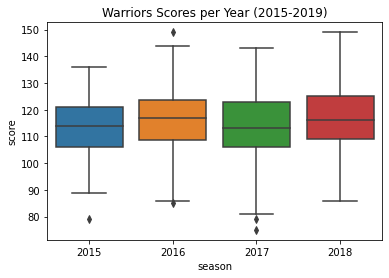

In [178]:
# box plot of scores per year
sns.boxplot(data=bball_df_final2, x='season', y='score').set(title='Warriors Scores per Year (2015-2019)')

In [179]:
# bar chart of wins vs losses every year

# use a pivot table to get wins and loses per year
winvloss_df = bball_df_final2.pivot_table(index=['season'], columns='result', aggfunc='size')
winvloss_df

result,Lose,Win
season,,
2015,18,88
2016,16,83
2017,29,74
2018,33,71


Text(0.5, 1.0, 'Wins vs. Losses Per Year')

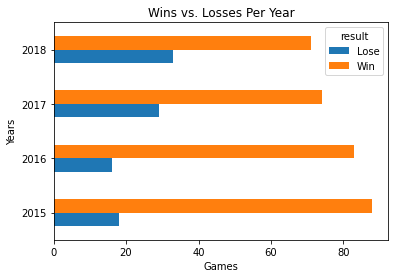

In [180]:
winvloss_df.plot.barh()
plt.xlabel('Games')
plt.ylabel('Years')
plt.title('Wins vs. Losses Per Year')

array([[<AxesSubplot:title={'center':'2015'}>,
        <AxesSubplot:title={'center':'2016'}>],
       [<AxesSubplot:title={'center':'2017'}>,
        <AxesSubplot:title={'center':'2018'}>]], dtype=object)

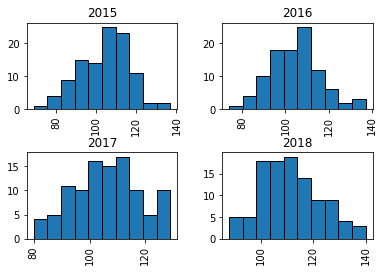

In [181]:
# histogram of opponent scores per season
bball_df_final2['opponent_score'].hist(by=bball_df_final2['season'], ec = 'black')